In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

path = "/content/RTA_1.csv"
da = pd.read_csv(path)



In [ ]:
da.head()

,Time,Day_of_week,accident_reference,accident_year,Age,Sex_,Driving_experience,Type_of_vehicle,Vehicle_service_year,Defect_of_vehicle,Area_accident_occured,Types_of_Junction,Road_surface_conditions,Light_conditions,Number_of_vehicles_involved,Vehicle_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,70151244,2022,25,Male,2-5,Automobile,5-10,0.0,Residential areas,No junction,Dry,Daylight,2,Going straight,Moving Backward,Slight Injury
1,17:02:00,Monday,70152668,2022,34,Male,2-5,Public (> 45 seats),5-10,0.0,Office areas,No junction,Dry,Daylight,2,Going straight,Overtaking,Slight Injury
2,17:02:00,Monday,70154696,2022,25,Male,5-10,Lorry (41?100Q),Above 10,0.0,Recreational areas,No junction,Dry,Daylight,2,Going straight,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,70154696,2023,27,Male,5-10,Public (> 45 seats),1-2,0.0,Office areas,Y Shape,Dry,Darkness - lights lit,2,Going straight,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,70154696,2022,25,Male,2-5,NaN,2-5,1.0,Industrial areas,Y Shape,Dry,Darkness - lights lit,2,Going straight,Overtaking,Slight Injury


In [ ]:
da.shape

(2999, 18)

In [ ]:
# Isolate the column
data = da.loc[:,('accident_reference','accident_year', 'Age', 'Sex_','Defect_of_vehicle','Accident_severity')]
data.head()

,accident_reference,accident_year,Age,Sex_,Defect_of_vehicle,Accident_severity
0,70151244,2022,25,Male,0.0,Slight Injury
1,70152668,2022,34,Male,0.0,Slight Injury
2,70154696,2022,25,Male,0.0,Serious Injury
3,70154696,2023,27,Male,0.0,Slight Injury
4,70154696,2022,25,Male,1.0,Slight Injury


In [ ]:
da.columns = ['Time','Day','accident_reference_number','Year','Age','Sex','Driving_experience','Type_of_vehicle','Vehicle_service_year','Defect_of_vehicle','Area_accident_occured','Types_of_Junction','Road_surface_conditions','Light_conditions','Number_of_vehicles_involved','Vehicle_movement','Cause_of_accident','Accident_severity']

In [ ]:
da.head()

,Time,Day,accident_reference_number,Year,Age,Sex,Driving_experience,Type_of_vehicle,Vehicle_service_year,Defect_of_vehicle,Area_accident_occured,Types_of_Junction,Road_surface_conditions,Light_conditions,Number_of_vehicles_involved,Vehicle_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,70151244,2022,25,Male,2-5,Automobile,5-10,0.0,Residential areas,No junction,Dry,Daylight,2,Going straight,Moving Backward,Slight Injury
1,17:02:00,Monday,70152668,2022,34,Male,2-5,Public (> 45 seats),5-10,0.0,Office areas,No junction,Dry,Daylight,2,Going straight,Overtaking,Slight Injury
2,17:02:00,Monday,70154696,2022,25,Male,5-10,Lorry (41?100Q),Above 10,0.0,Recreational areas,No junction,Dry,Daylight,2,Going straight,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,70154696,2023,27,Male,5-10,Public (> 45 seats),1-2,0.0,Office areas,Y Shape,Dry,Darkness - lights lit,2,Going straight,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,70154696,2022,25,Male,2-5,NaN,2-5,1.0,Industrial areas,Y Shape,Dry,Darkness - lights lit,2,Going straight,Overtaking,Slight Injury


In [ ]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         2999 non-null   object 
 1   Day                          2999 non-null   object 
 2   accident_reference_number    2999 non-null   object 
 3   Year                         2999 non-null   int64  
 4   Age                          2992 non-null   object 
 5   Sex                          2999 non-null   object 
 6   Driving_experience           2905 non-null   object 
 7   Type_of_vehicle              2740 non-null   object 
 8   Vehicle_service_year         2238 non-null   object 
 9   Defect_of_vehicle            2995 non-null   float64
 10  Area_accident_occured        2938 non-null   object 
 11  Types_of_Junction            2999 non-null   object 
 12  Road_surface_conditions      2999 non-null   object 
 13  Light_conditions  

In [ ]:
# Check for duplicates
duplicateRowsDF = da[da.duplicated()]
duplicateRowsDF

,Time,Day,accident_reference_number,Year,Age,Sex,Driving_experience,Type_of_vehicle,Vehicle_service_year,Defect_of_vehicle,Area_accident_occured,Types_of_Junction,Road_surface_conditions,Light_conditions,Number_of_vehicles_involved,Vehicle_movement,Cause_of_accident,Accident_severity


In [ ]:
da.drop(columns = ['accident_reference_number','Types_of_Junction','Vehicle_movement'], inplace = True)

In [ ]:
da.head()

,Time,Day,Year,Age,Sex,Driving_experience,Type_of_vehicle,Vehicle_service_year,Defect_of_vehicle,Area_accident_occured,Road_surface_conditions,Light_conditions,Number_of_vehicles_involved,Cause_of_accident,Accident_severity
0,17:02:00,Monday,2022,25,Male,2-5,Automobile,5-10,0.0,Residential areas,Dry,Daylight,2,Moving Backward,Slight Injury
1,17:02:00,Monday,2022,34,Male,2-5,Public (> 45 seats),5-10,0.0,Office areas,Dry,Daylight,2,Overtaking,Slight Injury
2,17:02:00,Monday,2022,25,Male,5-10,Lorry (41?100Q),Above 10,0.0,Recreational areas,Dry,Daylight,2,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,2023,27,Male,5-10,Public (> 45 seats),1-2,0.0,Office areas,Dry,Darkness - lights lit,2,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,2022,25,Male,2-5,NaN,2-5,1.0,Industrial areas,Dry,Darkness - lights lit,2,Overtaking,Slight Injury


In [ ]:
da.isnull().sum()

,0
Time,0
Day,0
Year,0
Age,7
Sex,0
Driving_experience,94
Type_of_vehicle,259
Vehicle_service_year,761
Defect_of_vehicle,4
Area_accident_occured,61


In [ ]:
da.isnull().sum().sum()

1186

In [ ]:
da.count()

,0
Time,2999
Day,2999
Year,2999
Age,2992
Sex,2999
Driving_experience,2905
Type_of_vehicle,2740
Vehicle_service_year,2238
Defect_of_vehicle,2995
Area_accident_occured,2938


In [ ]:
# Dataset before handling missing values
da.shape

(2999, 15)

In [ ]:
da.replace(['NA', 'N/A', 'na', 'NaN', ' ', '','nan ','NAN ','Unknown','unknown','NA ','na '], np.nan, inplace=True)

In [ ]:
# Drop the missing values
da.dropna(inplace = True)

In [ ]:
#Dataset after missing values are dropped
da.shape

(1709, 15)

In [ ]:
rows_with_na = da[da.isna().any(axis=1)]

# Display the rows
print(rows_with_na)


Empty DataFrame
Columns: [Time, Day, Year, Age, Sex, Driving_experience, Type_of_vehicle, Vehicle_service_year, Defect_of_vehicle, Area_accident_occured, Road_surface_conditions, Light_conditions, Number_of_vehicles_involved, Cause_of_accident, Accident_severity]
Index: []


In [ ]:
# Replace variations of 'NA', 'N/A', 'na', 'NaN', '  ' with NaN
import numpy as np

da.replace(['NA', 'N/A', 'na', 'NaN', '  ', 'NA  '], np.nan, inplace=True)

# Display rows that have any NaN values
rows_with_na = da[da.isna().any(axis=1)]

# Display the rows
rows_with_na


,Time,Day,Year,Age,Sex,Driving_experience,Type_of_vehicle,Vehicle_service_year,Defect_of_vehicle,Area_accident_occured,Road_surface_conditions,Light_conditions,Number_of_vehicles_involved,Cause_of_accident,Accident_severity
186,16:20:00,Friday,2022,NaN,Female,Above 10,Stationwagen,5-10,0.0,Office areas,Wet or damp,Darkness - lights lit,3,Moving Backward,Slight Injury
198,18:30:00,Monday,2022,NaN,Female,5-10,Pick up upto 10Q,Above 10,0.0,Other,Wet or damp,Darkness - lights lit,1,No distancing,Slight Injury
226,9:25:00,Tuesday,2022,NaN,Female,5-10,Other,2-5,0.0,Outside rural areas,Dry,Daylight,6,No priority to pedestrian,Slight Injury
228,9:25:00,Tuesday,2022,NaN,Female,5-10,Automobile,Above 10,0.0,Outside rural areas,Dry,Daylight,6,Driving carelessly,Slight Injury
229,9:25:00,Tuesday,2022,NaN,Female,1-2,Taxi,2-5,1.0,Outside rural areas,Dry,Daylight,6,Driving carelessly,Slight Injury
238,15:30:00,Saturday,2022,NaN,Female,2-5,Automobile,2-5,0.0,Other,Wet or damp,Daylight,2,No priority to vehicle,Slight Injury
312,12:00:00,Saturday,2022,NaN,Male,2-5,Stationwagen,2-5,0.0,Residential areas,Snow,Daylight,3,No priority to vehicle,Slight Injury
357,21:25:00,Thursday,2022,NaN,Male,Above 10,Automobile,Above 10,0.0,Other,Wet or damp,Darkness - lights lit,2,Overturning,Slight Injury
380,18:32:00,Tuesday,2022,NaN,Male,Below 1,Public (12 seats),1-2,1.0,Other,Dry,Darkness - lights lit,3,No distancing,Slight Injury
425,13:55:00,Sunday,2022,NaN,Male,5-10,Public (> 45 seats),Below 1,0.0,Office areas,Dry,Daylight,3,No priority to vehicle,Slight Injury


In [ ]:
da.shape

(1709, 15)

In [ ]:
# Drop rows with any NaN values directly in the da DataFrame
da.dropna(inplace=True)

# Check the shape of the cleaned DataFrame
print(da.shape)


(1685, 15)


In [ ]:
# Descriptive analysis of numerical data
non_numerical = ['Time','Age','Driving_experience','Vehicle_service_year']
da[non_numerical].describe()

,Time,Age,Driving_experience,Vehicle_service_year
count,1685,1685,1685,1685
unique,528,64,13,9
top,17:25:00,47,5-10,2-5
freq,20,287,496,586


In [ ]:
# Descriptive analysis of numerical data
numerical = ['Year','Defect_of_vehicle',]
da[numerical].describe()

,Year,Defect_of_vehicle
count,1685.000000,1685.000000
mean,2022.132938,0.326409
std,0.483837,0.469038
min,2021.000000,0.000000
25%,2022.000000,0.000000
50%,2022.000000,0.000000
75%,2022.000000,1.000000
max,2023.000000,1.000000


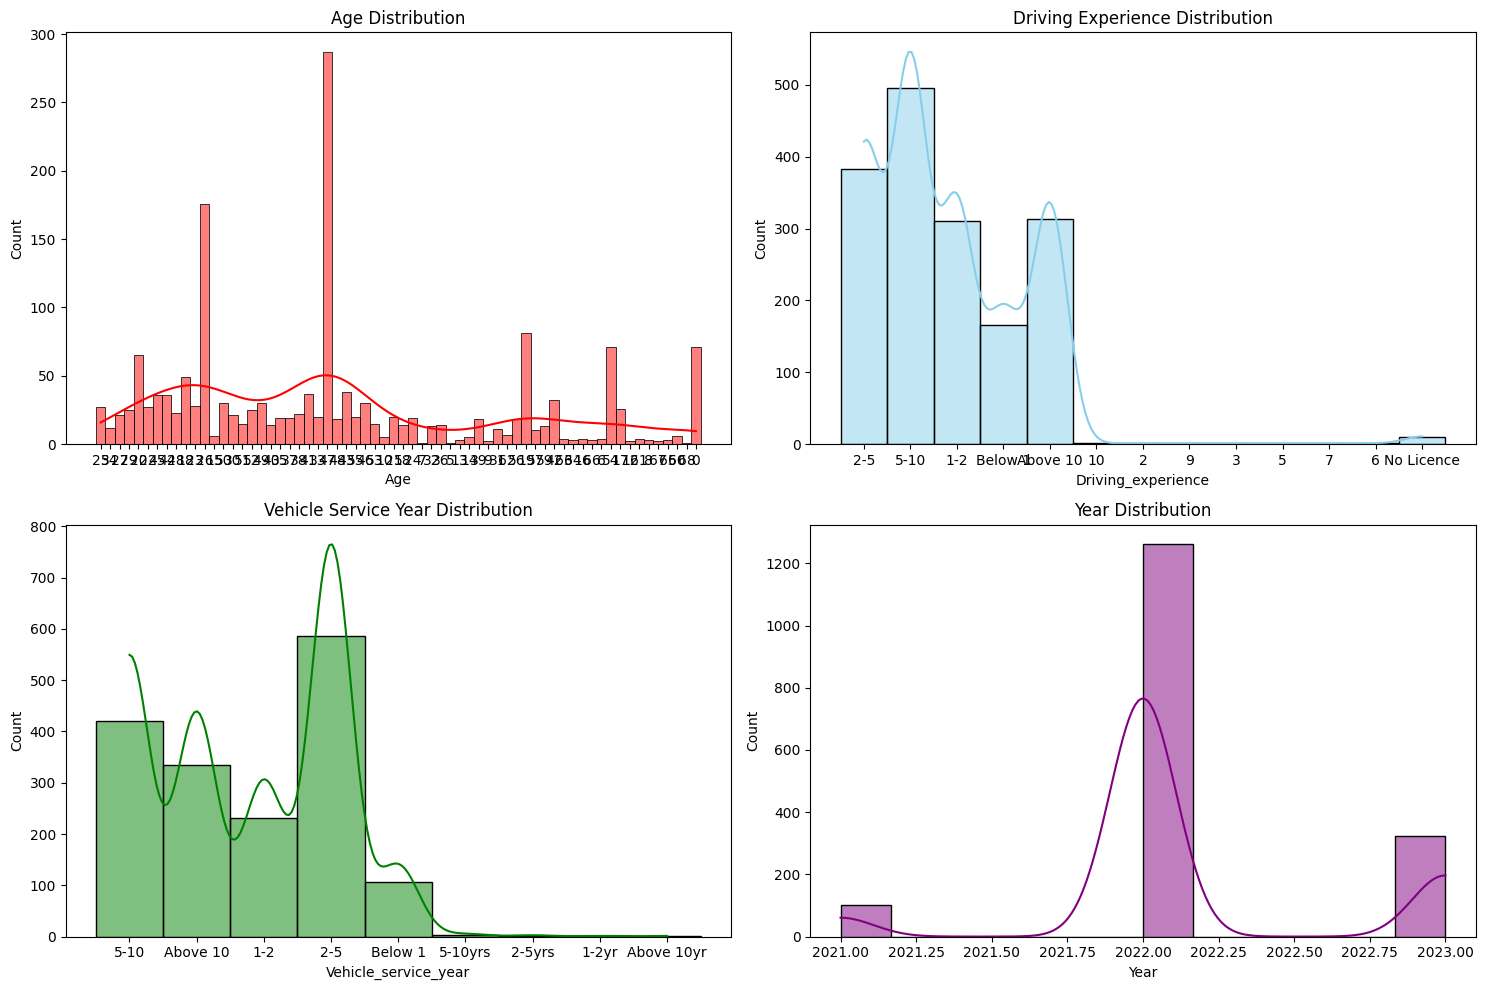

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot histogram and KDE for numeric variable 'Age'
sns.histplot(data=da, x="Age", kde=True, color="red", ax=axs[0, 0])
axs[0, 0].set_title("Age Distribution")

# Plot histogram and KDE for numeric variable 'Driving_experience'
sns.histplot(data=da, x="Driving_experience", kde=True, color="skyblue", ax=axs[0, 1])
axs[0, 1].set_title("Driving Experience Distribution")

# Plot histogram and KDE for numeric variable 'Vehicle_service_year'
sns.histplot(data=da, x="Vehicle_service_year", kde=True, color="green", ax=axs[1, 0])
axs[1, 0].set_title("Vehicle Service Year Distribution")

# Plot histogram and KDE for numeric variable 'Defect_of_vehicle'
sns.histplot(data=da, x="Year", kde=True, color="purple", ax=axs[1, 1])
axs[1, 1].set_title("Year Distribution")

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


<Axes: ylabel='Year'>

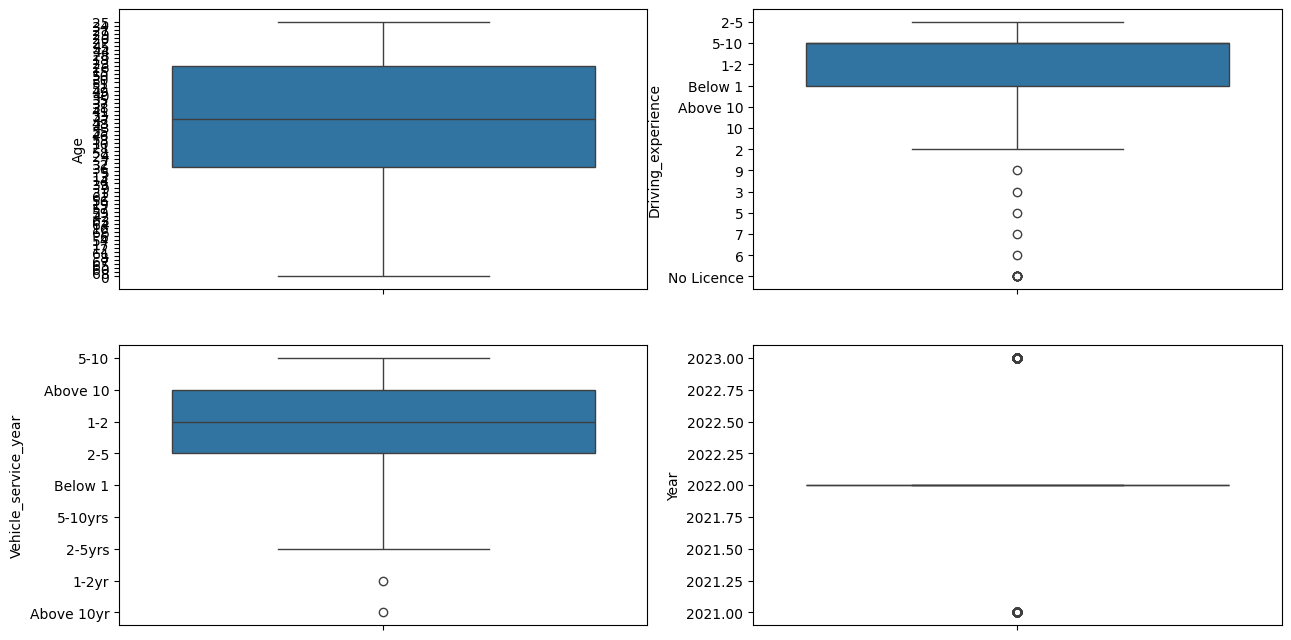

In [ ]:
# Create boxplot to observe distribution of numerical value
fig, axs = plt.subplots(2,2, figsize=(15,8))
sns.boxplot(da['Age'], ax = axs[0,0])
sns.boxplot(da['Driving_experience'], ax = axs[0,1])
sns.boxplot(da['Vehicle_service_year'], ax = axs[1,0])
sns.boxplot(da['Year'], ax = axs[1,1])

In [ ]:
# Calculate 25th, 50th, and 75th percentiles for Driving Experience
qd25, qd50, qd75 = np.percentile(da['Driving_experience'], [25, 50, 75])

# Calculate IQR for Driving Experience
iqrd = qd75 - qd25

# Calculate the lower and upper bounds for Driving Experience
mind = qd25 - 1.5 * iqrd
maxd = qd75 + 1.5 * iqrd

# Create a new dataframe with outliers removed (without modifying the original data)
cleaned_data = da[(da['Driving_experience'] > mind) & (da['Driving_experience'] < maxd)]

# Display the size of the original and cleaned datasets
print("Original data size:", data.shape)
print("Cleaned data size:", cleaned_data.shape)


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
# Calculate 25th, 50th, and 75th percentiles for Vehicle Service Year
qv25, qv50, qv75 = np.percentile(da['Age'], [25, 50, 75])

# Calculate IQR for Vehicle Service Year
iqrv = qv75 - qv25

# Calculate the lower and upper bounds for Vehicle Service Year
minv = qv25 - 1.5 * iqrv
maxv = qv75 + 1.5 * iqrv

# Create a new dataframe with outliers removed for Vehicle Service Year (without modifying the original data)
cleaned_data_vehicle_service = da[(da['Vehicle_service_year'] > minv) & (da['Vehicle_service_year'] < maxv)]

# Display the size of the original and cleaned datasets
print("Original data size:", data.shape)
print("Cleaned data size for Vehicle Service Year:", cleaned_data_vehicle_service.shape)


NameError: name 'np' is not defined

In [ ]:
#hot encoding
da['Defect_of_vehicle'] = da['Defect_of_vehicle'].replace({1 : 'Defect', 0 : 'No Defect'})
categorical=da['Defect_of_vehicle']
categorical.head()

,Defect_of_vehicle
0,No Defect
1,No Defect
2,No Defect
3,No Defect
6,No Defect


In [ ]:
da['Sex']=da['Sex'].replace({ 'Male':0 ,'Female':1})
numeric=da['Sex']
numeric.head()

<ipython-input-27-be73af07fa38>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  da['Sex']=da['Sex'].replace({ 'Male':0 ,'Female':1})


,Sex
0,0
1,0
2,0
3,0
6,0


In [ ]:
unique_values = da['Accident_severity'].unique()

# Print unique values
print("Unique values:", unique_values)

Unique values: ['Slight Injury' 'Serious Injury' 'Fatal injury']


In [ ]:
unique_values = da['Area_accident_occured'].unique()

# Print unique values
print("Unique values:", unique_values)

Unique values: ['Residential areas' 'Office areas' '  Recreational areas'
 ' Industrial areas' 'Other' ' Church areas' '  Market areas'
 'Rural village areas' ' Outside rural areas' ' Hospital areas'
 'School areas']


In [ ]:
unique_values = da['Type_of_vehicle'].unique()

# Print unique values
print("Unique values:", unique_values)

Unique values: ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)'
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Taxi' 'Turbo'
 'Motorcycle' 'Bicycle' 'Special vehicle' 'Bajaj']


In [ ]:
# Replace multiple categories in 'Vehicle.type' column
da['Type_of_vehicle'] = da['Type_of_vehicle'].replace(
    ['Lorry (41?100Q)', 'Lorry (11?40Q)', 'Long lorry'], 'Lorry'
).replace(
    ['Public (> 45 seats)', 'Public (13?45 seats)', 'Public (12 seats)'], 'Public'
).replace(
    ['Motorcycle', 'Bicycle', 'Bajaj'], 'Motorcycle'
)

# Print the unique values in the updated 'Vehicle.type' column
print(da['Type_of_vehicle'].unique())

# Optionally, print the entire column to inspect the updates
da['Type_of_vehicle']


['Automobile' 'Public' 'Lorry' 'Pick up upto 10Q' 'Stationwagen'
 'Ridden horse' 'Other' 'Taxi' 'Turbo' 'Motorcycle' 'Special vehicle']


,Type_of_vehicle
0,Automobile
1,Public
2,Lorry
3,Public
6,Automobile
...,...
2993,Lorry
2994,Lorry
2995,Motorcycle
2996,Automobile


In [ ]:
# Create a copy of the 'Type_of_vehicle' column
da_copy = da.copy()

# Replace categories with numeric values
da_copy['Type_of_vehicle'] = da_copy['Type_of_vehicle'].replace('Automobile', 1)
da_copy['Type_of_vehicle'] = da_copy['Type_of_vehicle'].replace('Public', 2)
da_copy['Type_of_vehicle'] = da_copy['Type_of_vehicle'].replace('Lorry', 3)
da_copy['Type_of_vehicle'] = da_copy['Type_of_vehicle'].replace('Pick up upto 10Q', 4)
da_copy['Type_of_vehicle'] = da_copy['Type_of_vehicle'].replace('Stationwagen', 5)
da_copy['Type_of_vehicle'] = da_copy['Type_of_vehicle'].replace('Ridden horse', 6)
da_copy['Type_of_vehicle'] = da_copy['Type_of_vehicle'].replace('Other', 7)
da_copy['Type_of_vehicle'] = da_copy['Type_of_vehicle'].replace('Taxi', 8)
da_copy['Type_of_vehicle'] = da_copy['Type_of_vehicle'].replace('Turbo', 9)
da_copy['Type_of_vehicle'] = da_copy['Type_of_vehicle'].replace('Motorcycle', 10)
da_copy['Type_of_vehicle'] = da_copy['Type_of_vehicle'].replace('Special vehicle', 11)
da_copy['Accident_severity']=da_copy['Accident_severity'].replace('Slight Injury',1)
da_copy['Accident_severity']=da_copy['Accident_severity'].replace('Serious Injury',2)
da_copy['Accident_severity']=da_copy['Accident_severity'].replace('Fatal Injury',3)
da_copy['Day']=da_copy['Day'].replace('Sunday',1)
da_copy['Day']=da_copy['Day'].replace('Monday',2)
da_copy['Day']=da_copy['Day'].replace('Tuesday',3)
da_copy['Day']=da_copy['Day'].replace('Wednesday',4)
da_copy['Day']=da_copy['Day'].replace('Thursday',5)
da_copy['Day']=da_copy['Day'].replace('Friday',6)
da_copy['Day']=da_copy['Day'].replace('Saturday',7)
# Normalize the column to remove spaces and make matching consistent
da_copy['Area_accident_occured'] = da_copy['Area_accident_occured'].str.strip()

# Replace categories with numeric values
da_copy['Area_accident_occured'] = da_copy['Area_accident_occured'].replace({
    'Residential areas': 1,
    'Office areas': 2,
    'Recreational areas': 3,
    'Industrial areas': 4,
    'Church areas': 5,
    'Market areas': 6,
    'Rural village areas': 7,
    'Outside rural areas': 8,
    'Hospital areas': 9,
    'School areas': 10,
    'Other': 11
})

da_copy['Road_surface_conditions']=da_copy['Road_surface_conditions'].replace('Dry',0)
da_copy['Road_surface_conditions']=da_copy['Road_surface_conditions'].replace('Wet or damp',1)
da_copy['Road_surface_conditions']=da_copy['Road_surface_conditions'].replace('Snow',2)
da_copy['Light_conditions']=da_copy['Light_conditions'].replace('Daylight',0)
da_copy['Light_conditions']=da_copy['Light_conditions'].replace('Darkness - lights lit',1)
da_copy['Light_conditions']=da_copy['Light_conditions'].replace('Darkness - lights unlit',2)
da_copy['Light_conditions']=da_copy['Light_conditions'].replace('Darkness - no lighting',3)
da_copy['Accident_severity']=da_copy['Accident_severity'].replace(1,'Slight Injury')
da_copy['Accident_severity']=da_copy['Accident_severity'].replace(2,'Serious Injury')


# Check the unique values in the updated column (in the copied DataFrame)

categorical_data=da_copy[['Type_of_vehicle','Accident_severity','Day','Area_accident_occured','Road_surface_conditions','Light_conditions']]
categorical_data.head()


<ipython-input-32-3da97e96bb73>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  da_copy['Type_of_vehicle'] = da_copy['Type_of_vehicle'].replace('Special vehicle', 11)
<ipython-input-32-3da97e96bb73>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  da_copy['Day']=da_copy['Day'].replace('Saturday',7)
<ipython-input-32-3da97e96bb73>:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to 

,Type_of_vehicle,Accident_severity,Day,Area_accident_occured,Road_surface_conditions,Light_conditions
0,1,Slight Injury,2,1,0,0
1,2,Slight Injury,2,2,0,0
2,3,Serious Injury,2,3,0,0
3,2,Slight Injury,1,2,0,1
6,1,Slight Injury,4,1,0,0


In [ ]:
# Get dummies for categorical data
import pandas as pd
categorical_data=da[['Type_of_vehicle','Area_accident_occured','Accident_severity']]
dummy = pd.get_dummies(categorical_data,drop_first=True)
dummy

,Type_of_vehicle_Lorry,Type_of_vehicle_Motorcycle,Type_of_vehicle_Other,Type_of_vehicle_Pick up upto 10Q,Type_of_vehicle_Public,Type_of_vehicle_Ridden horse,Type_of_vehicle_Special vehicle,Type_of_vehicle_Stationwagen,Type_of_vehicle_Taxi,Type_of_vehicle_Turbo,...,Area_accident_occured_ Hospital areas,Area_accident_occured_ Industrial areas,Area_accident_occured_ Outside rural areas,Area_accident_occured_Office areas,Area_accident_occured_Other,Area_accident_occured_Residential areas,Area_accident_occured_Rural village areas,Area_accident_occured_School areas,Accident_severity_Serious Injury,Accident_severity_Slight Injury
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2994,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2995,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [ ]:
new_data = da.copy()  # Make a copy of the original data
new_data['Age'] = pd.cut(da['Age'], [18, 30, 40, 50, 60, 70, 80])
new_data.head()

TypeError: '<' not supported between instances of 'int' and 'str'

In [ ]:
da.dtypes

,0
Time,object
Day,object
Year,int64
Age,object
Sex,int64
Driving_experience,object
Type_of_vehicle,object
Vehicle_service_year,object
Defect_of_vehicle,object
Area_accident_occured,object


In [ ]:
# Step 1: Convert 'Age' to numeric, setting non-numeric values to NaN
da['Age'] = pd.to_numeric(da['Age'], errors='coerce')

# Step 2: Handle NaN values, for example by dropping rows with NaN values
da = da.dropna(subset=['Age'])

# Step 3: Convert 'Age' to integer
da['Age'] = da['Age'].astype('int')

# Verify the change
print(da['Age'].dtypes)  # Should print 'int64'
da.head() # Check the first few rows to see the changes


int64


,Time,Day,Year,Age,Sex,Driving_experience,Type_of_vehicle,Vehicle_service_year,Defect_of_vehicle,Area_accident_occured,Road_surface_conditions,Light_conditions,Number_of_vehicles_involved,Cause_of_accident,Accident_severity
0,17:02:00,Monday,2022,25,0,2-5,Automobile,5-10,No Defect,Residential areas,Dry,Daylight,2,Moving Backward,Slight Injury
1,17:02:00,Monday,2022,34,0,2-5,Public,5-10,No Defect,Office areas,Dry,Daylight,2,Overtaking,Slight Injury
2,17:02:00,Monday,2022,25,0,5-10,Lorry,Above 10,No Defect,Recreational areas,Dry,Daylight,2,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,2023,27,0,5-10,Public,1-2,No Defect,Office areas,Dry,Darkness - lights lit,2,Changing lane to the right,Slight Injury
6,17:30:00,Wednesday,2022,25,0,2-5,Automobile,2-5,No Defect,Residential areas,Dry,Daylight,1,Other,Slight Injury


In [ ]:
# Group categorical data
da['Sex']=da['Sex'].replace({0:'Male' ,1:'Female'})
data_cat = da.groupby(['Age','Sex']).agg({'Accident_severity': [lambda x : np.mean(x == 'Serious Injury'), np.size]})
data_cat.columns = ['proportion','size']
data_cat

proportion  size
Age Sex                     
0   Female    0.083333    12
    Male      0.101695    59
10  Female    0.000000     1
    Male      0.500000     4
12  Male      0.000000     2
...                ...   ...
67  Male      0.000000     2
68  Male      0.000000     1
7   Male      0.000000     1
8   Male      0.333333     3
9   Male      0.000000     2

[93 rows x 2 columns]

In [ ]:
# Select numerical columns
data_num = da[['Year', 'Age', 'Sex', 'Number_of_vehicles_involved']]

# Group by Age and Sex and compute mean and standard deviation
aggregated_data = data_num.groupby(['Age', 'Sex']).agg(['mean', 'std'])

# Display the result
aggregated_data


Year           Number_of_vehicles_involved          
                   mean       std                        mean       std
Age Sex                                                                
0   Female  2022.166667  0.717741                    1.916667  0.668558
    Male    2022.322034  0.539498                    1.813559  0.472505
5   Male    2022.000000       NaN                    1.000000       NaN
6   Female  2023.000000       NaN                    1.000000       NaN
    Male    2022.000000  0.000000                    2.333333  0.577350
...                 ...       ...                         ...       ...
65  Female  2022.000000       NaN                    1.000000       NaN
    Male    2022.500000  0.707107                    2.000000  0.000000
66  Male    2022.000000  0.000000                    2.000000  0.000000
67  Male    2022.500000  0.707107                    2.500000  0.707107
68  Male    2022.000000       NaN                    2.000000       NaN

[93 rows x 4 columns]

In [ ]:
# Group by 'Accident_severity' and 'Day', and aggregate with mean and std
aggregated_data = da.groupby(['Accident_severity', 'Day']).agg({
    'Year': ['mean', 'std'],
    'Number_of_vehicles_involved': ['mean', 'std']
})

# Display the aggregated result
aggregated_data


Year            \
                                    mean       std   
Accident_severity Day                                
Fatal injury      Friday     2023.000000       NaN   
                  Monday     2023.000000       NaN   
                  Saturday   2022.000000  0.000000   
                  Sunday     2022.250000  0.500000   
                  Thursday   2022.333333  0.577350   
                  Wednesday  2022.000000       NaN   
Serious Injury    Friday     2022.145833  0.504852   
                  Monday     2022.068966  0.371391   
                  Saturday   2022.090909  0.294245   
                  Sunday     2021.833333  0.383482   
                  Thursday   2022.125000  0.404304   
                  Tuesday    2022.000000  0.559017   
                  Wednesday  2022.200000  0.516398   
Slight Injury     Friday     2022.147679  0.477596   
                  Monday     2022.171123  0.466767   
                  Saturday   2022.121547  0.443007   
                  Sunday     2022.178571  0.505318   
                  Thursday   2022.106977  0.485969   
                  Tuesday    2022.130435  0.485991   
                  Wednesday  2022.120536  0.534654   

                            Number_of_vehicles_involved            
                                                   mean       std  
Accident_severity Day                                              
Fatal injury      Friday                       1.000000       NaN  
                  Monday                       2.000000       NaN  
                  Saturday                     1.666667  0.577350  
                  Sunday                       2.000000  0.000000  
                  Thursday                     2.000000  0.000000  
                  Wednesday                    1.000000       NaN  
Serious Injury    Friday                       1.895833  0.592132  
                  Monday                       1.758621  0.635563  
                  Saturday                     1.500000  0.511766  
                  Sunday                       1.666667  0.685994  
                  Thursday                     1.625000  0.490290  
                  Tuesday                      2.090909  1.041742  
                  Wednesday                    1.925000  0.572332  
Slight Injury     Friday                       1.966245  0.588484  
                  Monday                       2.048128  0.561138  
                  Saturday                     1.977901  0.623216  
                  Sunday                       2.083333  0.623076  
                  Thursday                     1.958140  0.606134  
                  Tuesday                      1.969565  0.563779  
                  Wednesday                    1.959821  0.546651

In [ ]:
# Group by 'Accident_severity' and 'Road_surface_conditions', and aggregate with count and mode
aggregated_data = da.groupby(['Accident_severity', 'Road_surface_conditions']).agg({
    'Type_of_vehicle': lambda x: x.mode()[0],  # Most frequent value (mode)
    'Defect_of_vehicle': 'count',  # Number of occurrences
})

# Display the aggregated result
aggregated_data


Type_of_vehicle  Defect_of_vehicle
Accident_severity Road_surface_conditions                                   
Fatal injury      Dry                          Automobile                 13
Serious Injury    Dry                          Automobile                163
                  Wet or damp                       Lorry                 67
Slight Injury     Dry                          Automobile               1144
                  Snow                              Other                 12
                  Wet or damp                  Automobile                286

In [ ]:
pd.crosstab(da.Sex, da.Age)

Age,0,5,6,7,8,9,10,12,13,14,...,59,60,61,62,63,64,65,66,67,68
Sex,,,,,,,,,,,,,,,,,,,,,
Female,12,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
Male,59,1,3,1,3,2,4,2,3,5,...,13,5,4,6,4,3,2,3,2,1


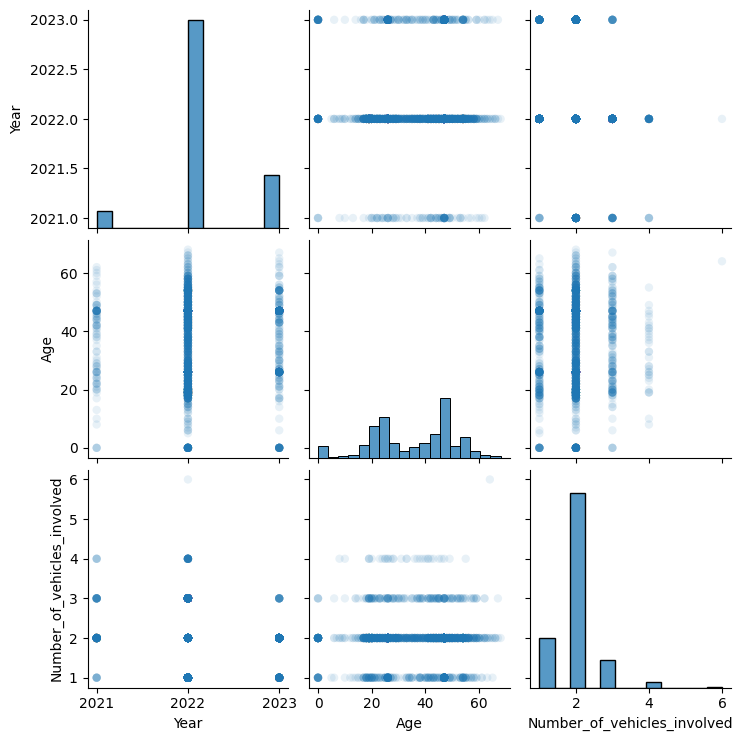

In [ ]:
# Pairplot of numerical variables
sns.pairplot(da, plot_kws=dict(alpha=.1, edgecolor='none'))

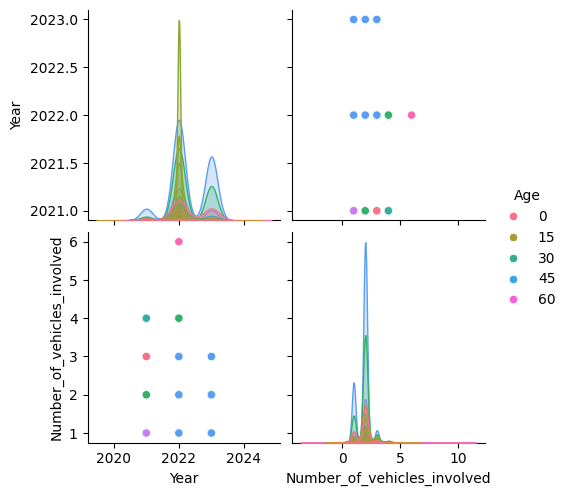

In [ ]:
# Pairplot of numerical variables divided by gender
sns.pairplot(da, hue = 'Age', palette = 'husl')

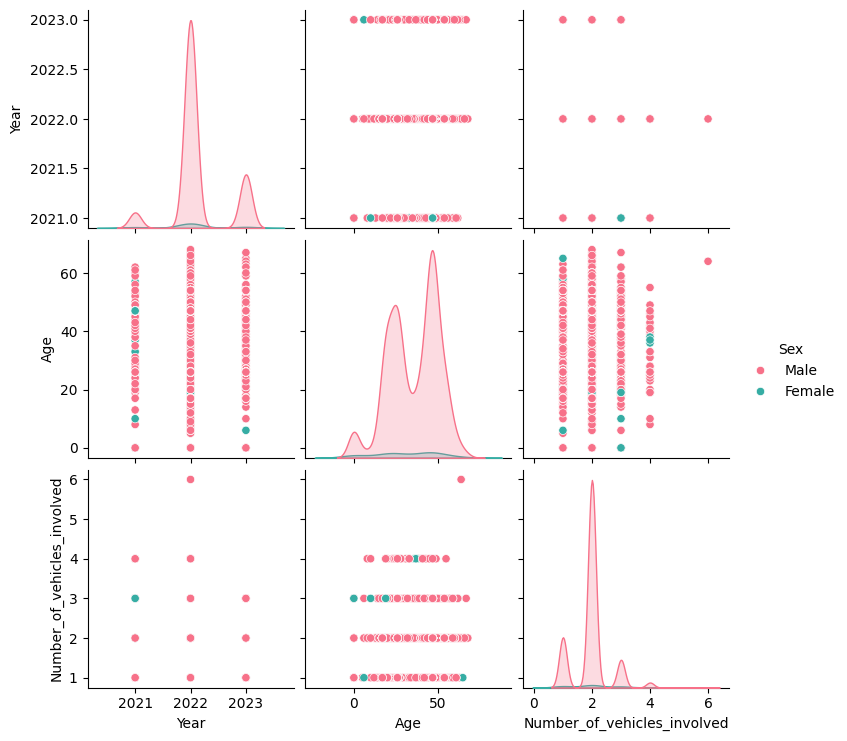

In [ ]:
# Pairplot of numerical variables divided by gender
sns.pairplot(da, hue = 'Sex', palette = 'husl')

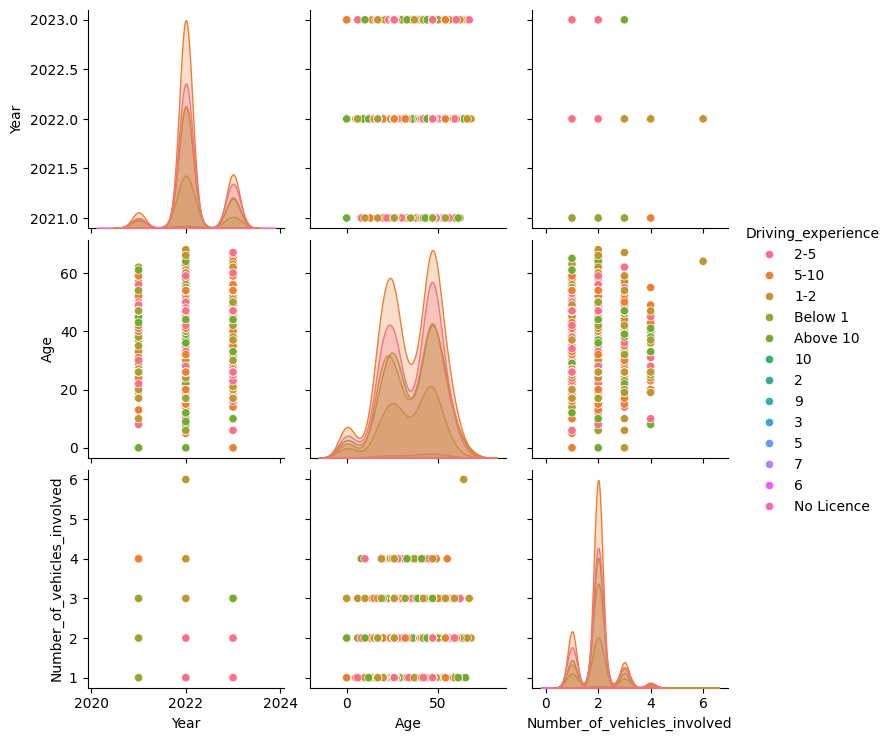

In [ ]:

# Pairplot of numerical variables divided by gender
sns.pairplot(da, hue = 'Driving_experience', palette = 'husl')


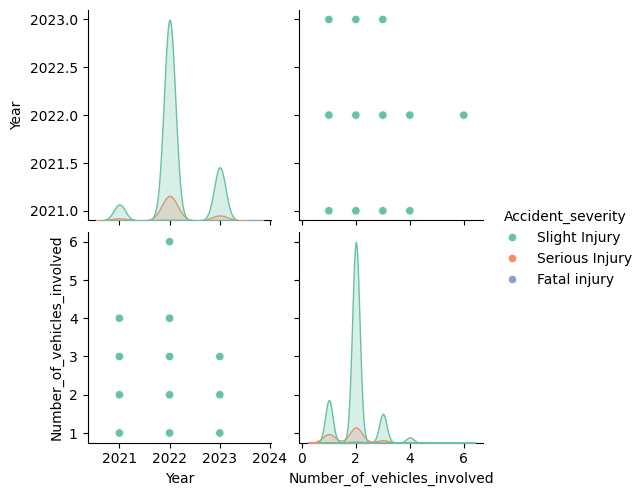

In [ ]:
# # Pairplot of numerical variables divided by smoking habit
sns.pairplot(da, hue = 'Accident_severity', palette = 'Set2')

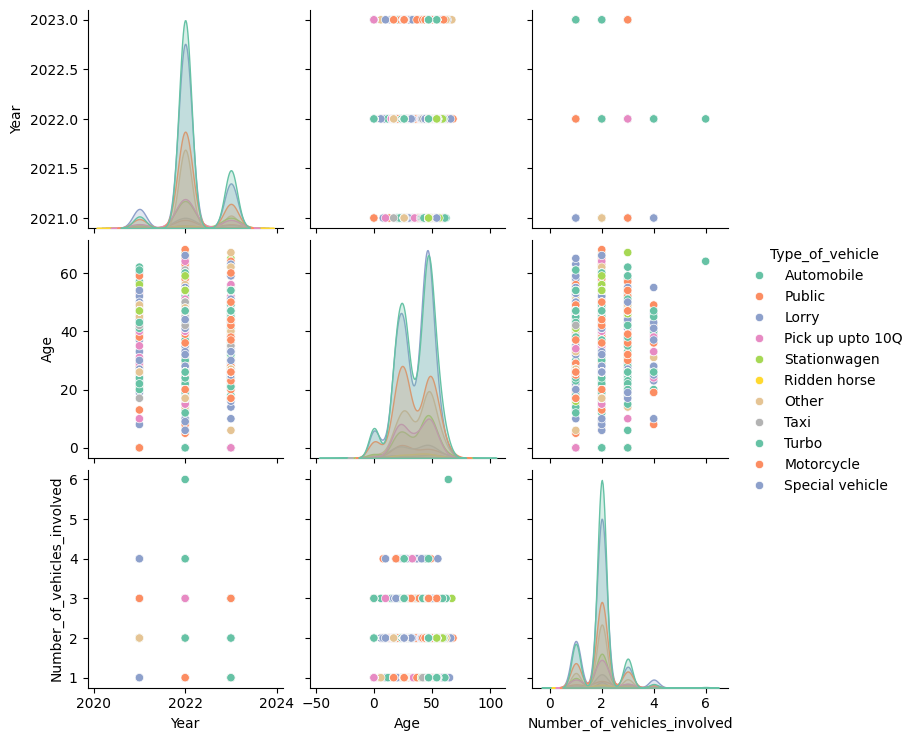

In [ ]:
# # Pairplot of numerical variables divided by smoking habit
sns.pairplot(da, hue = 'Type_of_vehicle', palette = 'Set2')

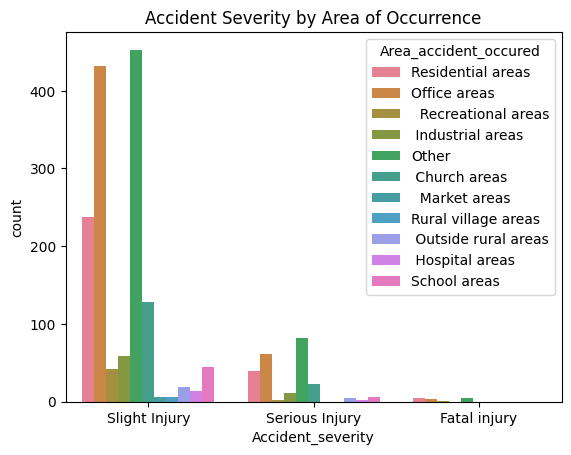

In [ ]:
sns.countplot(x='Accident_severity', hue='Area_accident_occured', data=da)
plt.title('Accident Severity by Area of Occurrence')
plt.show()


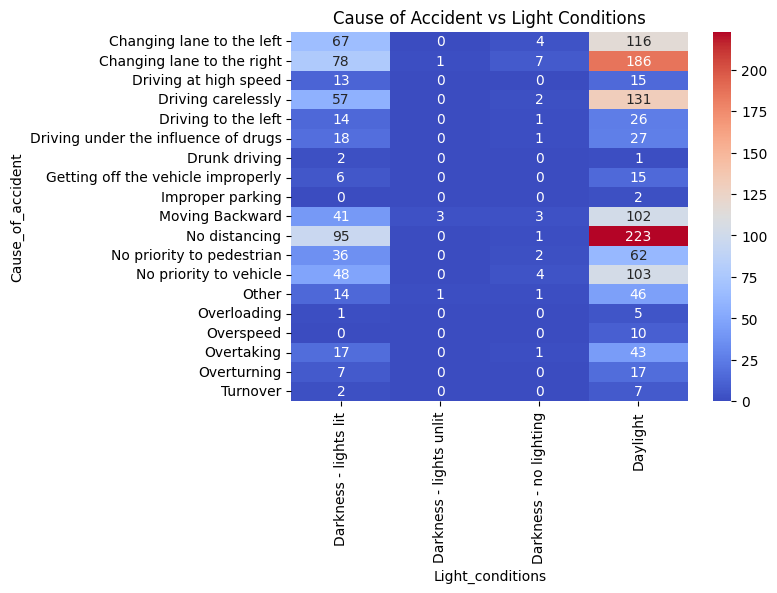

In [ ]:
crosstab = pd.crosstab(da['Cause_of_accident'], da['Light_conditions'])
sns.heatmap(crosstab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Cause of Accident vs Light Conditions')
plt.show()


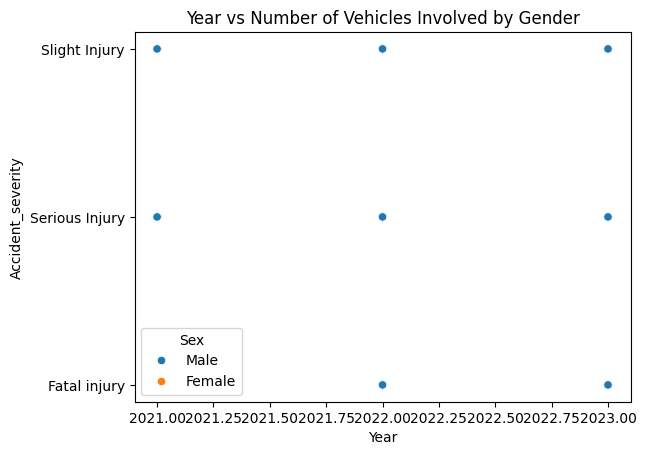

In [ ]:
sns.scatterplot(x='Year', y='Accident_severity', hue='Sex', data=da)
plt.title('Year vs Number of Vehicles Involved by Gender')
plt.show()


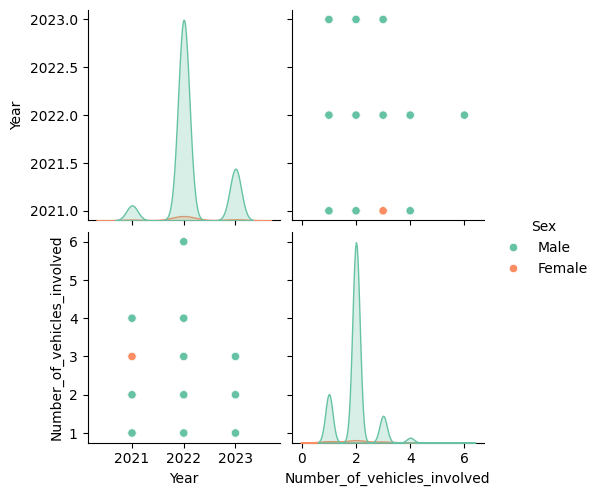

In [ ]:
sns.pairplot(da, vars=['Year', 'Number_of_vehicles_involved'], hue='Sex', palette='Set2')
plt.show()


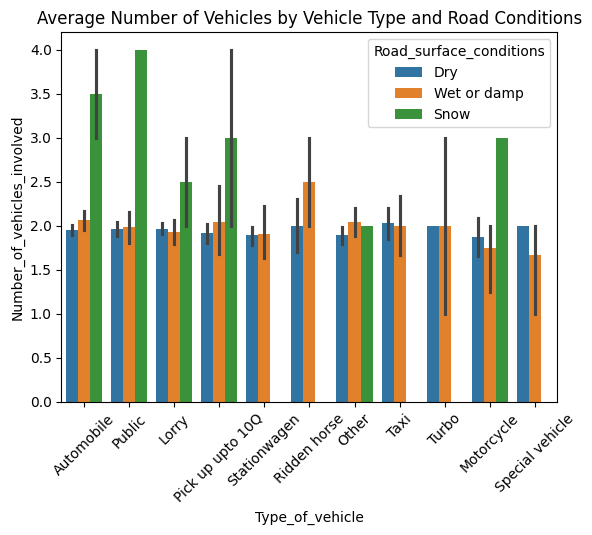

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Type_of_vehicle', y='Number_of_vehicles_involved', hue='Road_surface_conditions', data=da)
plt.title('Average Number of Vehicles by Vehicle Type and Road Conditions')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.show()


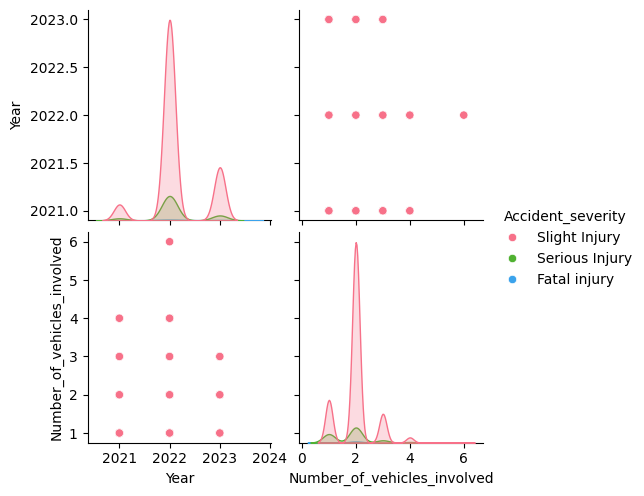

In [ ]:
sns.pairplot(data=da, hue='Accident_severity', vars=['Year', 'Number_of_vehicles_involved'], palette='husl')
plt.show()


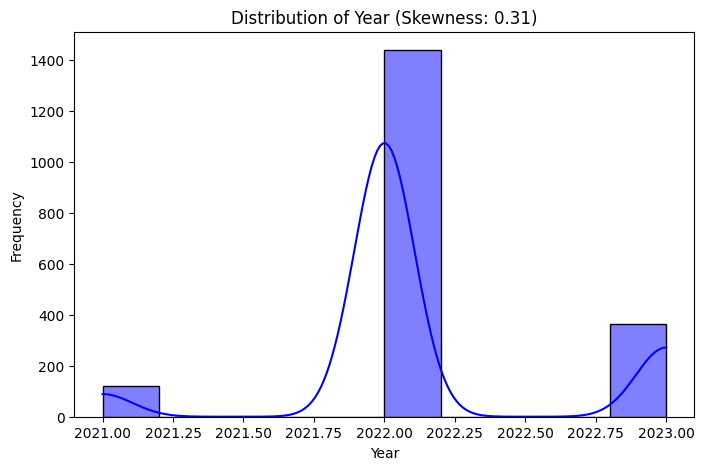

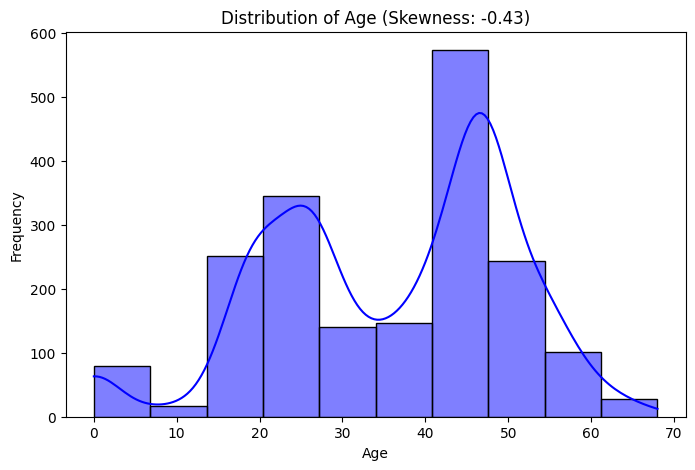

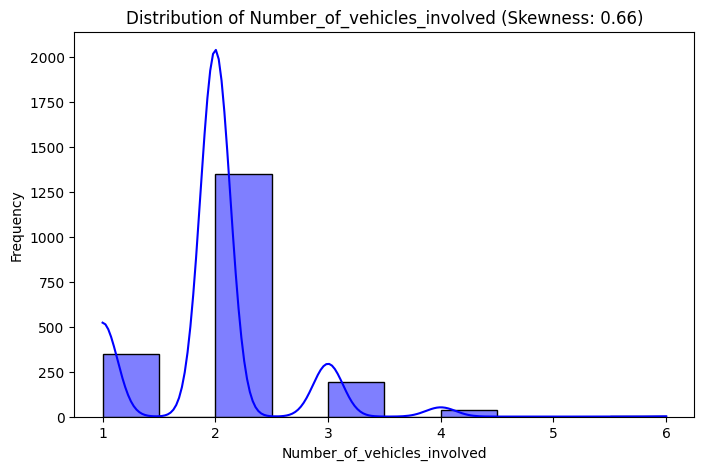

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = da

# Step 1: Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Plot skewness for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, color='blue', bins=10)
    plt.title(f"Distribution of {col} (Skewness: {df[col].skew():.2f})")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [ ]:
import pandas as pd

# Assuming df is your dataset
# Selecting the numeric columns
numeric_columns = ['Year', 'Number_of_vehicles_involved', 'Age']

# Calculating skewness
skewness_values = df[numeric_columns].skew()

# Displaying skewness
print("Skewness of numerical columns:")
print(skewness_values)


Skewness of numerical columns:
Year                           0.311875
Number_of_vehicles_involved    0.656650
Age                           -0.434616
dtype: float64


Kurtosis of numerical columns:
Year                           0.806404
Number_of_vehicles_involved    2.602754
Age                           -0.490770
dtype: float64


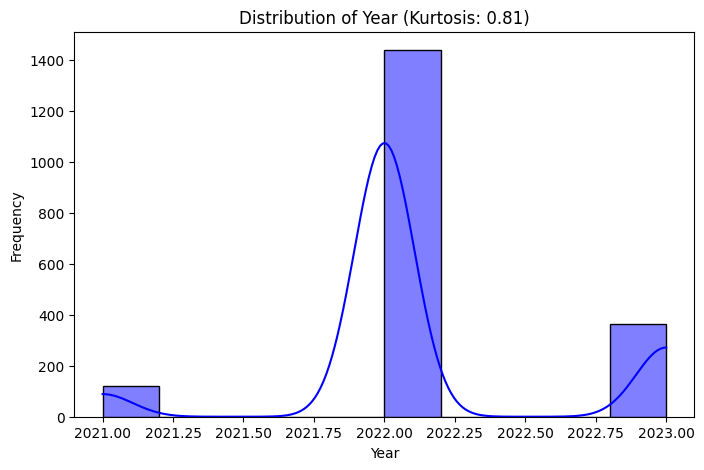

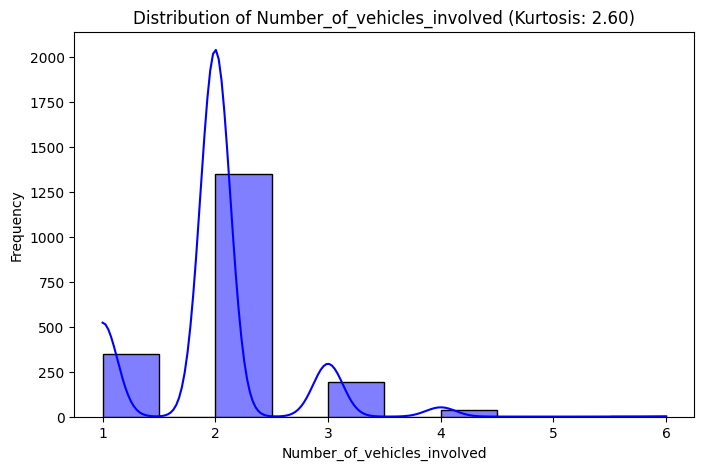

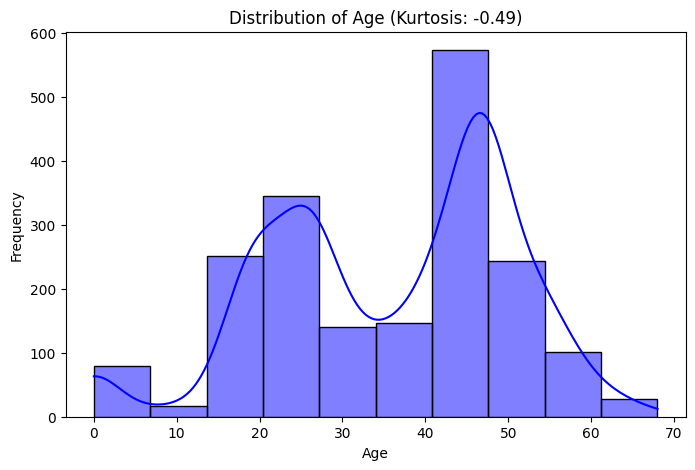

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your dataset
numerical_cols = ['Year', 'Number_of_vehicles_involved','Age']  # Add numerical columns here

# Display kurtosis for each numerical column
print("Kurtosis of numerical columns:")
print(df[numerical_cols].kurt())

# Plot distribution with kurtosis value for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, color='blue', bins=10)
    kurt_value = df[col].kurt()
    plt.title(f"Distribution of {col} (Kurtosis: {kurt_value:.2f})")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [ ]:
import pandas as pd

# Assuming df is your dataset
# Selecting the numeric columns
numeric_columns = ['Year', 'Number_of_vehicles_involved', 'Age']

# Calculating skewness
skewness_values = df[numeric_columns].kurt()

# Displaying skewness
print("Skewness of numerical columns:")
print(skewness_values)


Skewness of numerical columns:
Year                           0.806404
Number_of_vehicles_involved    2.602754
Age                           -0.490770
dtype: float64


In [ ]:
# Example for specific numeric columns
numeric_columns = ['Year', 'Age']

# Calculate mean, median, and mode for specific columns
mean_values = df[numeric_columns].mean()
median_values = df[numeric_columns].median()
mode_values = df[numeric_columns].mode()

print("Mean of selected columns:")
print(mean_values)

print("\nMedian of selected columns:")
print(median_values)

print("\nMode of selected columns:")
print(mode_values)


Mean of selected columns:
Year    2022.127471
Age       35.950572
dtype: float64

Median of selected columns:
Year    2022.0
Age       40.0
dtype: float64

Mode of selected columns:
   Year  Age
0  2022   47


In [ ]:
# Grouping by 'Area_accident_occured' and applying multiple aggregation functions
grouped_data = df.groupby('Area_accident_occured').agg({
    'Number_of_vehicles_involved': ['mean', 'sum', 'count'],
    'Year': 'median',
})

print(grouped_data)


                      Number_of_vehicles_involved                Year
                                             mean   sum count  median
Area_accident_occured                                                
  Market areas                           1.833333    11     6  2022.0
  Recreational areas                     2.058824   105    51  2022.0
 Church areas                            1.935673   331   171  2022.0
 Hospital areas                          2.210526    42    19  2022.0
 Industrial areas                        1.897436   148    78  2022.0
 Outside rural areas                     2.038462    53    26  2022.0
Office areas                             1.946524  1092   561  2022.0
Other                                    1.987118  1234   621  2022.0
Residential areas                        1.909938   615   322  2022.0
Rural village areas                      2.000000    12     6  2023.0
School areas                             2.016667   121    60  2022.0
Unknown             

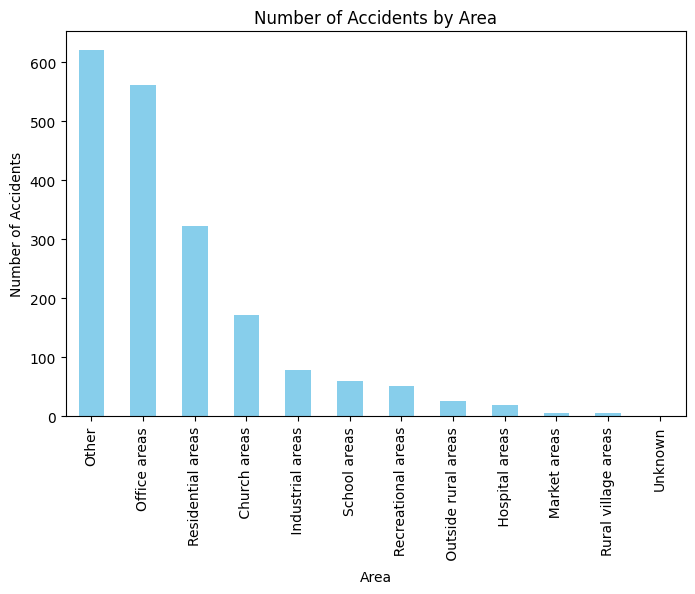

In [ ]:
import matplotlib.pyplot as plt

# Bar plot for accidents by area
df['Area_accident_occured'].value_counts().plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Number of Accidents by Area')
plt.xlabel('Area')
plt.ylabel('Number of Accidents')
plt.show()


In [ ]:
# Creating a pivot table
pivot_table = pd.pivot_table(
    da,
    values='Number_of_vehicles_involved',  # Aggregation target
    index=['Accident_severity'],          # Rows
    columns=['Light_conditions'],         # Columns
    aggfunc='sum',                        # Aggregation function (sum in this case)
    fill_value=0                          # Replace NaN with 0
)

pivot_table

Light_conditions,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight
Accident_severity,,,,
Fatal injury,12,0,1,10
Serious Injury,115,0,11,290
Slight Injury,870,12,33,1955


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


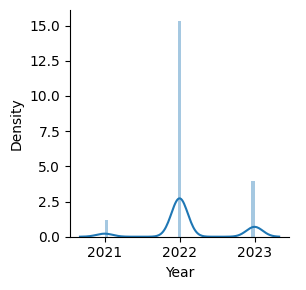

In [ ]:
#distribution plot
sns.FacetGrid(da, height=3).map(sns.distplot, "Year").add_legend()


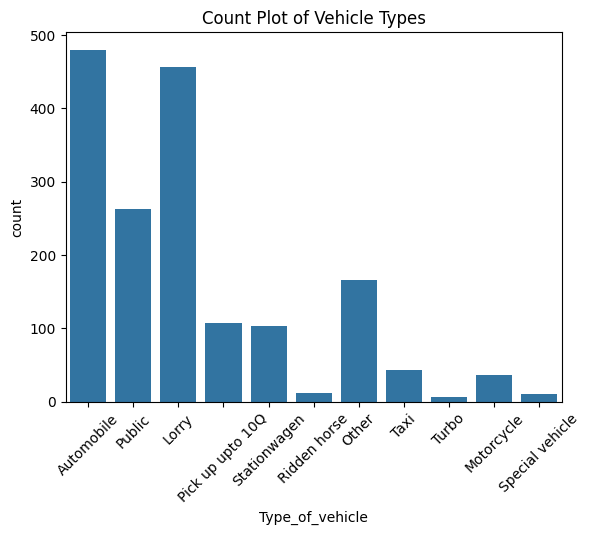

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=da, x='Type_of_vehicle')
plt.title("Count Plot of Vehicle Types")
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()


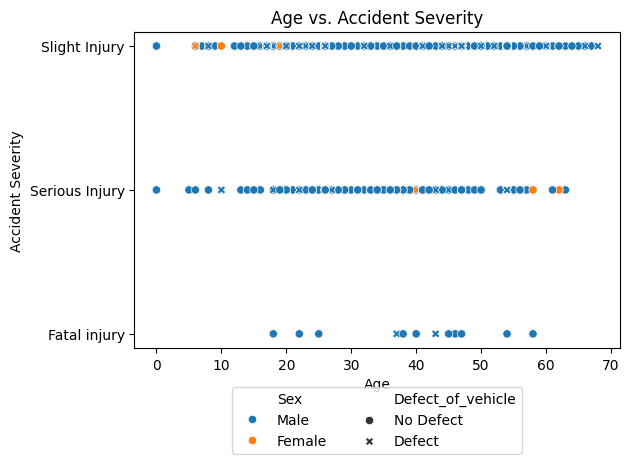

In [ ]:
sns.scatterplot(data=da, x='Age', y='Accident_severity', hue='Sex', style='Defect_of_vehicle')
plt.title("Age vs. Accident Severity")
plt.xlabel("Age")
plt.ylabel("Accident Severity")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)  # Horizontal legend
plt.tight_layout()
plt.show()


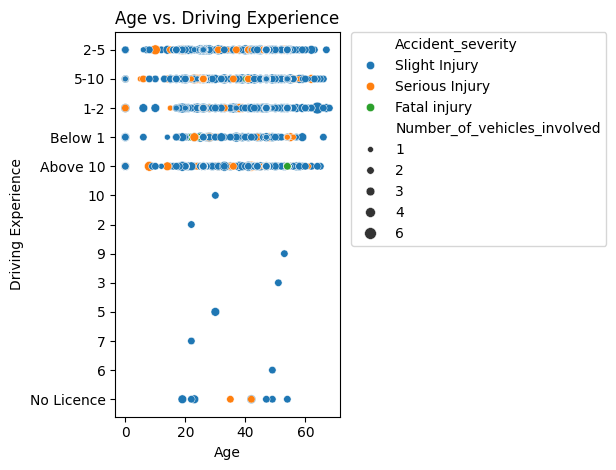

In [ ]:
sns.scatterplot(data=da, x='Age', y='Driving_experience', hue='Accident_severity', size='Number_of_vehicles_involved')
plt.title("Age vs. Driving Experience")
plt.xlabel("Age")
plt.ylabel("Driving Experience")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)  # Move legend outside
plt.tight_layout()
plt.show()


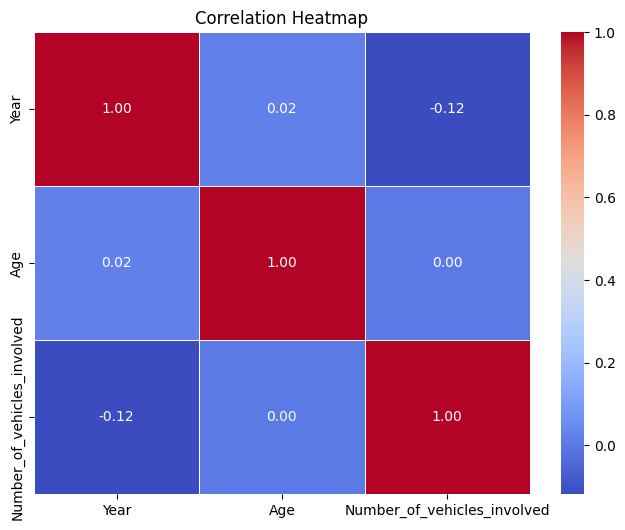

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract numerical columns for correlation
numerical_data = da[['Year', 'Age', 'Number_of_vehicles_involved']]

# Compute correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
da_copy.dtypes

,0
Time,object
Day,int64
Year,int64
Age,int64
Sex,object
Driving_experience,object
Type_of_vehicle,int64
Vehicle_service_year,object
Defect_of_vehicle,object
Area_accident_occured,int64


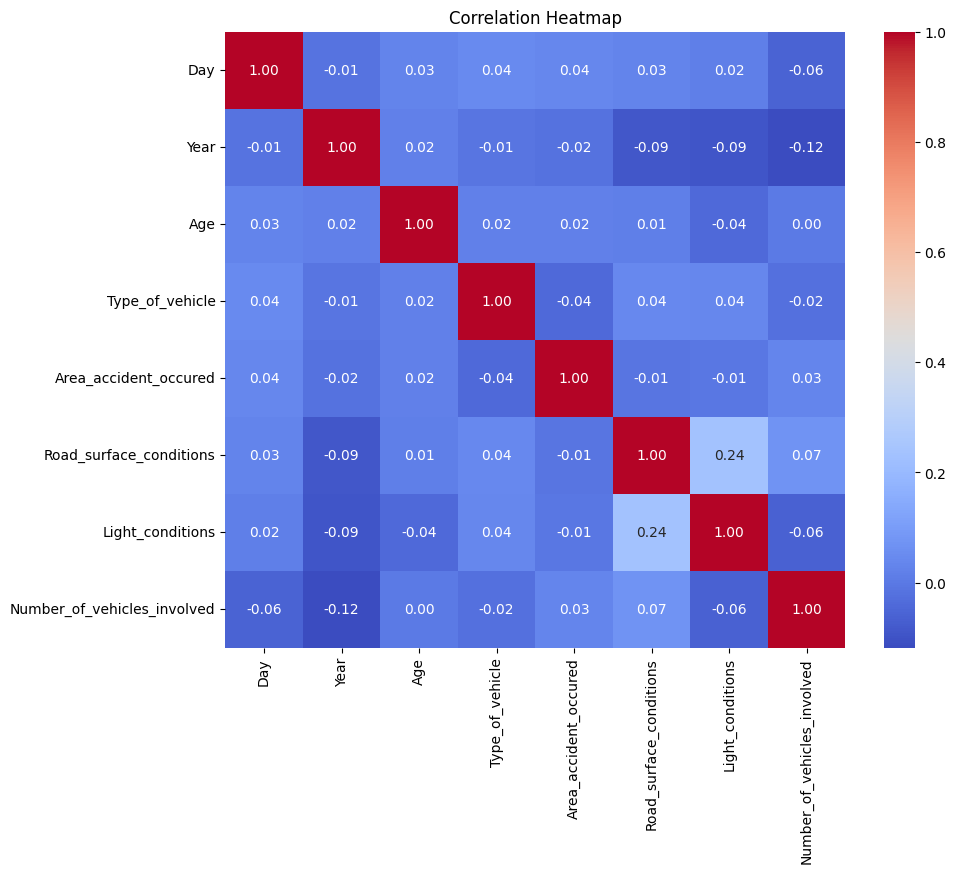

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = ['Day', 'Year', 'Age', 'Type_of_vehicle',
                   'Area_accident_occured', 'Road_surface_conditions',
                   'Light_conditions', 'Number_of_vehicles_involved']

# Compute the correlation matrix
correlation_matrix = da_copy[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


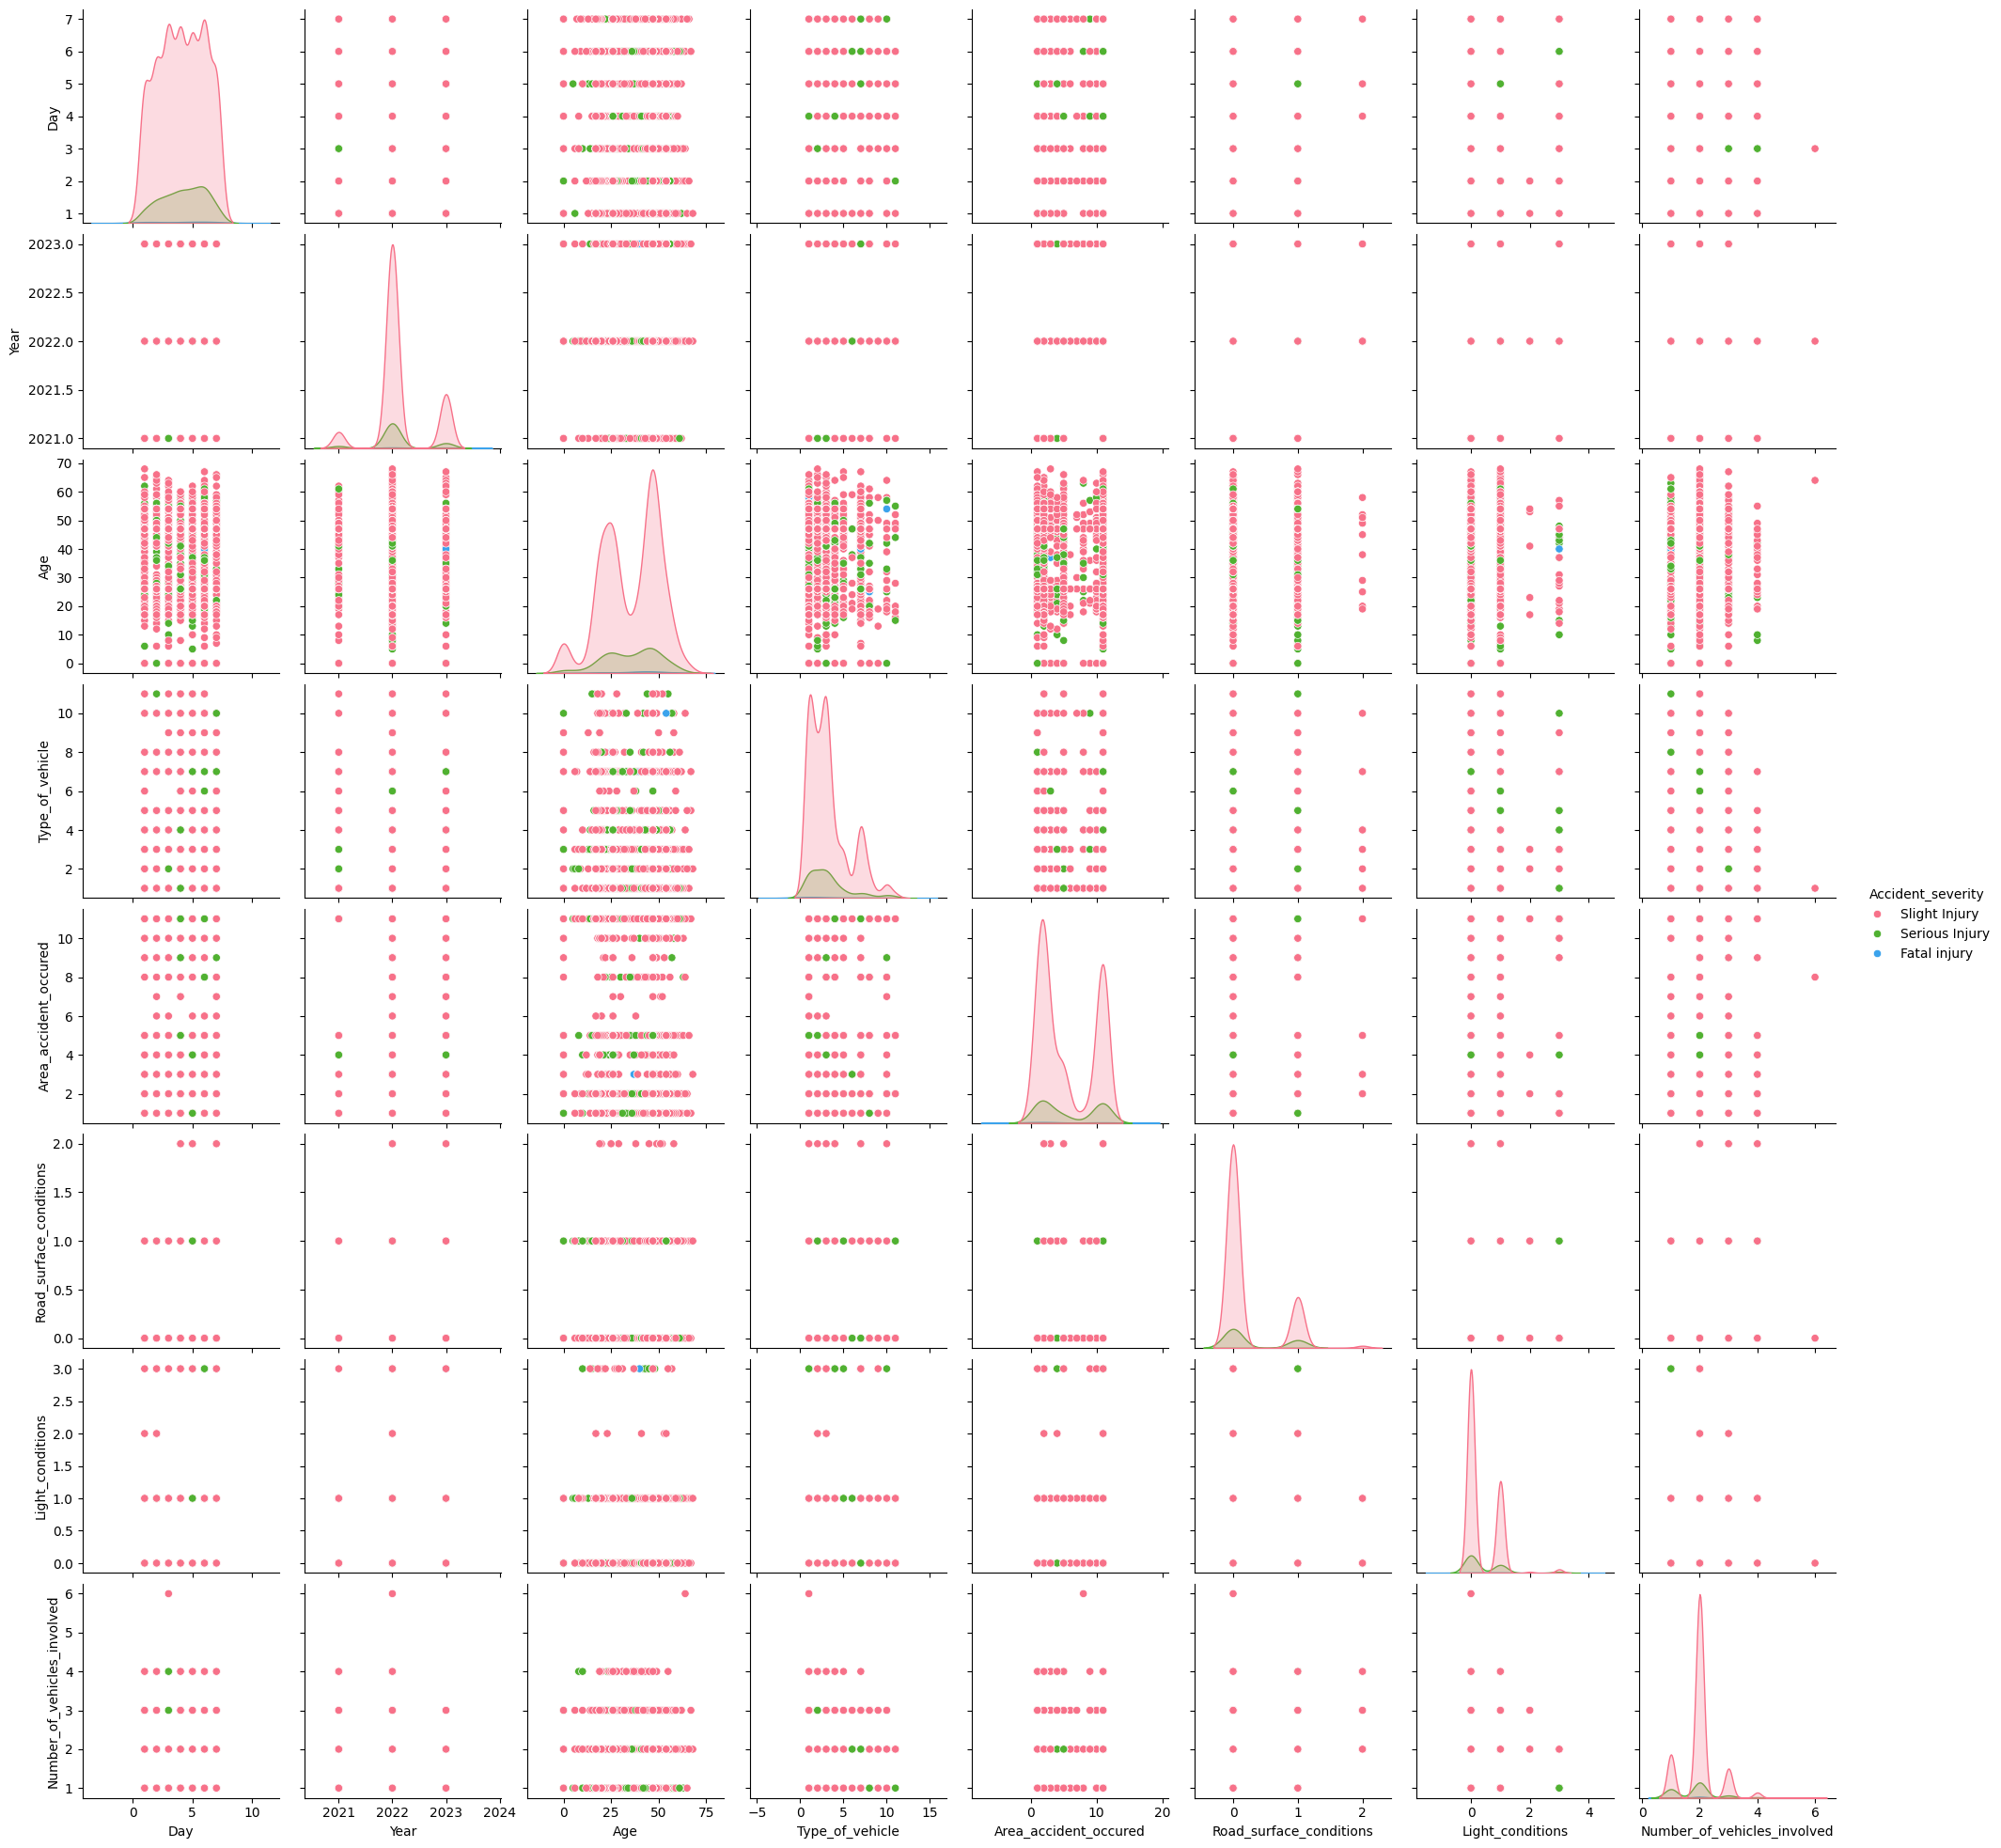

In [ ]:

# Pairplot of numerical variables divided by gender
sns.pairplot(da_copy, hue = 'Accident_severity', palette = 'husl')


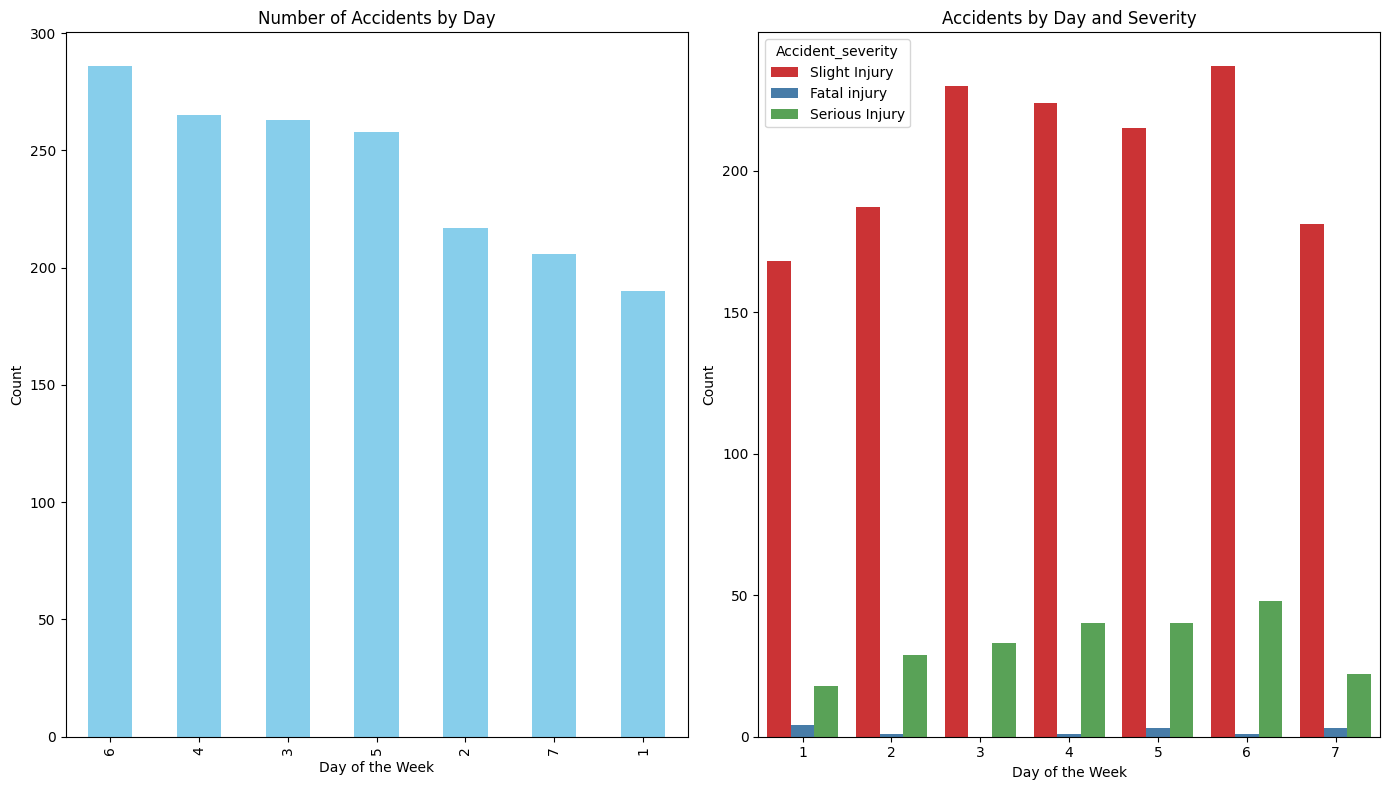

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8))

# Plot 1: Bar plot for 'Day' (accidents by day of the week)
da_copy["Day"].value_counts().plot.bar(color="skyblue", ax=ax[0])
ax[0].set_title("Number of Accidents by Day")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Day of the Week")

# Plot 2: Count plot for 'Day' with 'Accident_severity' as hue
sns.countplot(x="Day", hue="Accident_severity", data=da_copy, ax=ax[1], palette='Set1')
ax[1].set_title("Accidents by Day and Severity")
ax[1].set_xlabel("Day of the Week")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


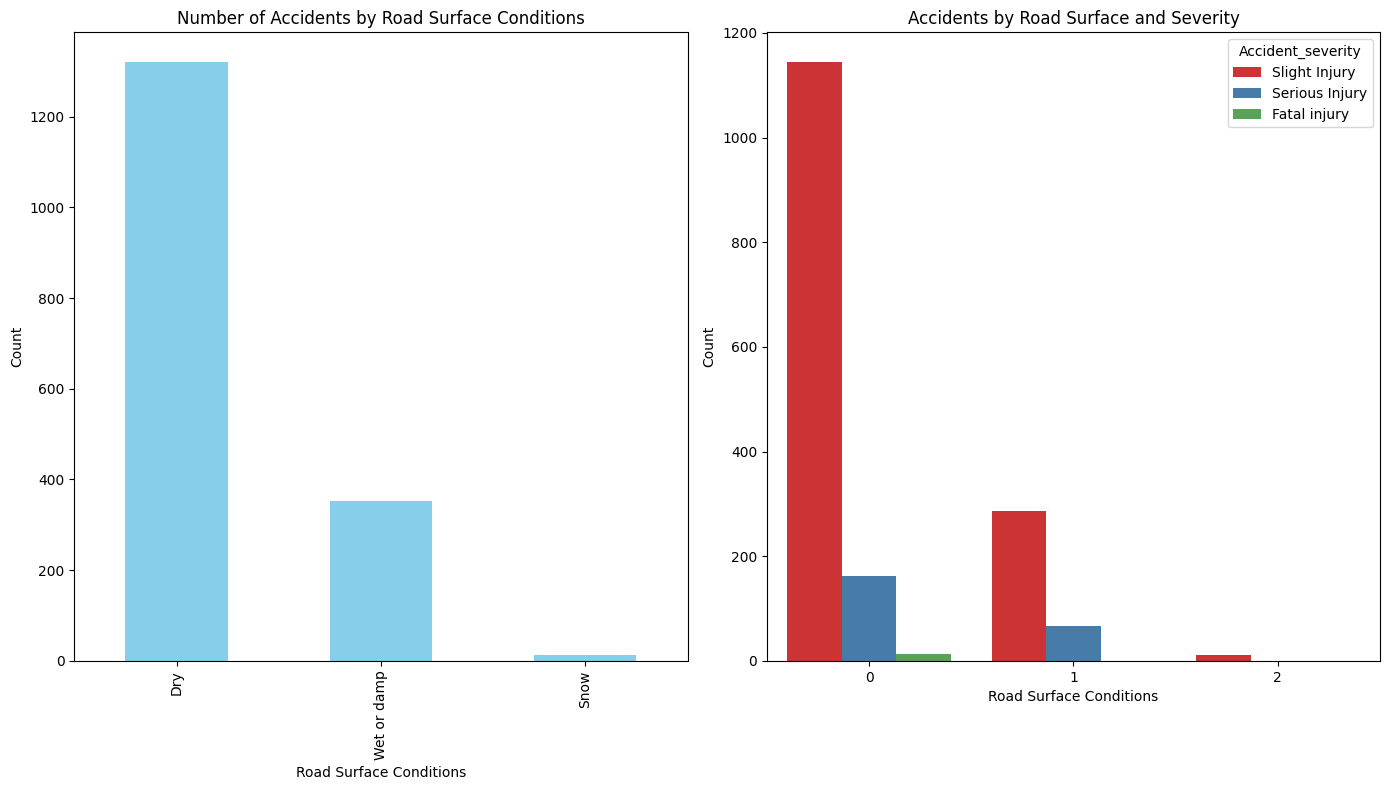

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8))

# Plot 1: Bar plot for 'Road_surface_conditions' (accidents by road surface condition)
da["Road_surface_conditions"].value_counts().plot.bar(color="skyblue", ax=ax[0])
ax[0].set_title("Number of Accidents by Road Surface Conditions")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Road Surface Conditions")

# Plot 2: Count plot for 'Road_surface_conditions' with 'Accident_severity' as hue
sns.countplot(x="Road_surface_conditions", hue="Accident_severity", data=da_copy, ax=ax[1], palette='Set1')
ax[1].set_title("Accidents by Road Surface and Severity")
ax[1].set_xlabel("Road Surface Conditions")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


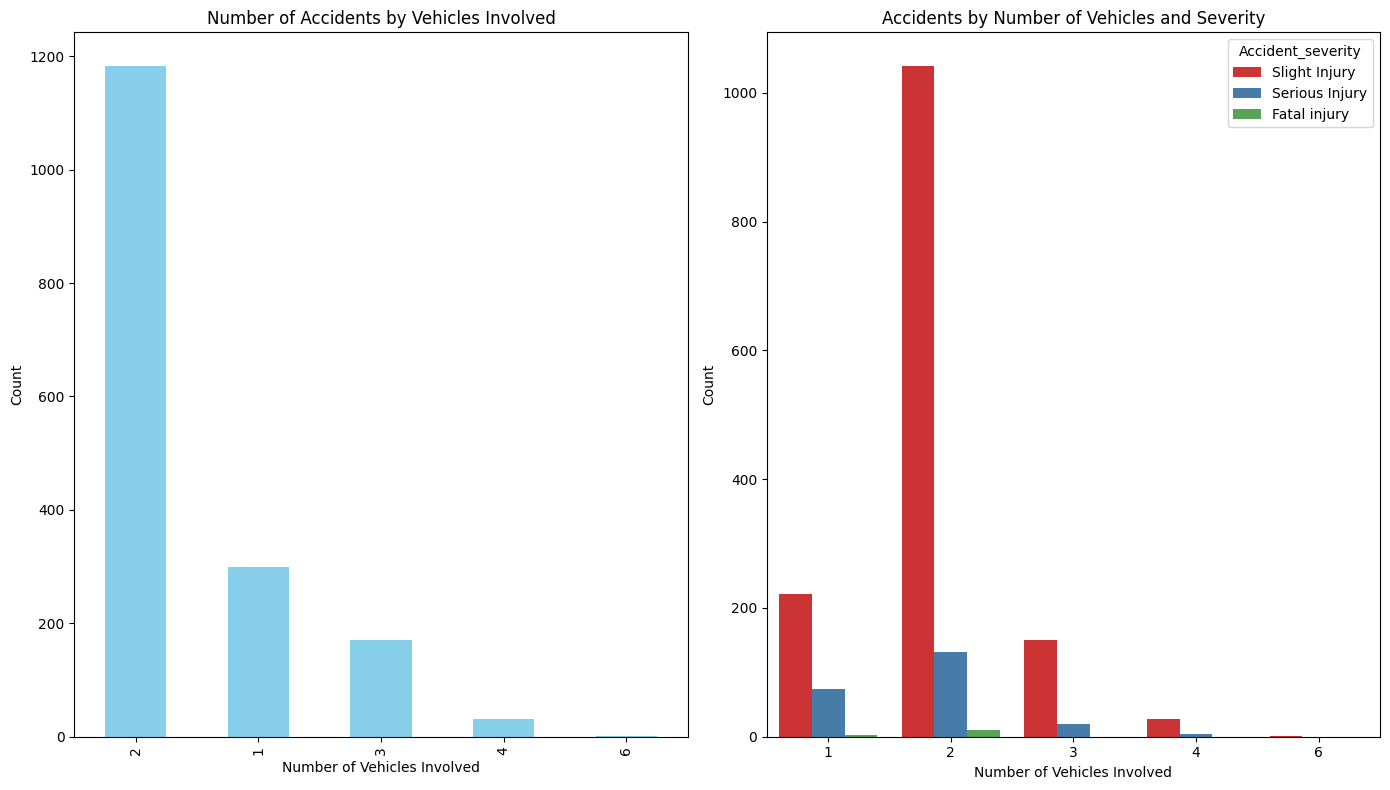

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8))

# Plot 1: Bar plot for 'Number_of_vehicles_involved' (accidents by number of vehicles)
da_copy["Number_of_vehicles_involved"].value_counts().plot.bar(color="skyblue", ax=ax[0])
ax[0].set_title("Number of Accidents by Vehicles Involved")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Number of Vehicles Involved")

# Plot 2: Count plot for 'Number_of_vehicles_involved' with 'Accident_severity' as hue
sns.countplot(x="Number_of_vehicles_involved", hue="Accident_severity", data=da, ax=ax[1], palette='Set1')
ax[1].set_title("Accidents by Number of Vehicles and Severity")
ax[1].set_xlabel("Number of Vehicles Involved")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


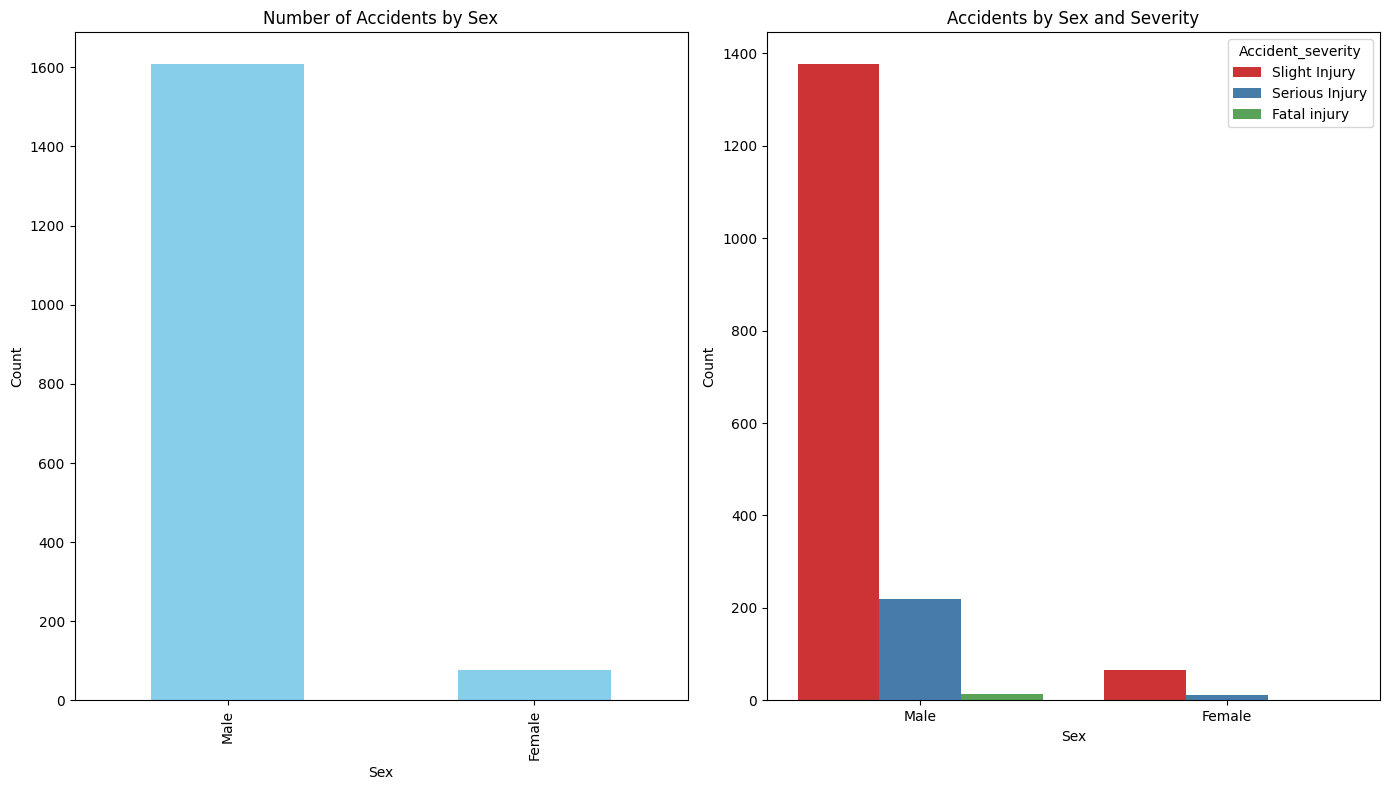

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8))

# Plot 1: Bar plot for 'Sex' (accidents by sex)
da_copy["Sex"].value_counts().plot.bar(color="skyblue", ax=ax[0])
ax[0].set_title("Number of Accidents by Sex")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Sex")

# Plot 2: Count plot for 'Sex' with 'Accident_severity' as hue
sns.countplot(x="Sex", hue="Accident_severity", data=da_copy, ax=ax[1], palette='Set1')
ax[1].set_title("Accidents by Sex and Severity")
ax[1].set_xlabel("Sex")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()
